## Assignment 2 - Data Stewardship

## Deadline:  Nov 28, 23:59,  [y.he2@uva.nl](mailto:y.he2@uva.nl)

## Upload your notebook file on Canvas

## Notebook made by  

|**Name** | **Student id** | **email**|
|:- |:-|:-|
|narendra parigi | 12089265 | naren.parigi@gmail.com|
|tom brogtrop    | 12476544 | tobro@outlook.com |

 We (enlisted above) declare that:
1. Our assignment will be our own work.
2. We shall not make solutions to the assignment available to anyone else.
3. We shall not engage in any other activities that will dishonestly improve my results or dishonestly improve or hurt the results of others.

Note: 
- your notebook should give no errors when executed as "Run All" cells
- ** Use markdown cell setting for comments/additional explanation **

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pandas import Series, DataFrame
import pandas as pd
plt.rc('figure', figsize=(10, 6))
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('ClothingStore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28799 entries, 0 to 28798
Data columns (total 52 columns):
HHKEY              28799 non-null float64
ZIP_CODE           28799 non-null int64
REC                28799 non-null int64
FRE                28799 non-null int64
MON                28799 non-null float64
CC_CARD            28799 non-null int64
AVRG               28799 non-null float64
PC_CALC20          28799 non-null int64
PSWEATERS          28799 non-null float64
PKNIT_TOPS         28799 non-null float64
PKNIT_DRES         28799 non-null float64
PBLOUSES           28799 non-null float64
PJACKETS           28799 non-null float64
PCAR_PNTS          28799 non-null float64
PCAS_PNTS          28799 non-null float64
PSHIRTS            28799 non-null float64
PDRESSES           28799 non-null float64
PSUITS             28799 non-null float64
POUTERWEAR         28799 non-null float64
PJEWELRY           28799 non-null float64
PFASHION           28799 non-null float64
PLEGWEAR           

In [4]:
df.head(5)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,WEB,MAILED,RESPONDED,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,Tot_Spend,Sales per Visit
0,9.955600e+12,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,0,5,0,31.81,111.00,10,0.00,0,368.46,184.2300
1,9.955600e+12,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,0,4,2,32.72,43.50,10,0.03,1,258.00,64.5000
2,9.955600e+12,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,0,4,0,100.00,68.60,16,0.00,0,77.00,38.5000
3,9.955600e+12,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,0,9,6,23.27,26.96,10,0.00,0,846.06,105.7575
4,9.955600e+12,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,0,0,0,28.52,24.50,20,0.00,0,87.44,87.4400


# <font color='blue'>Introduction</font>

In this assignment, you are acting as analysts for a retail clothing store chain. 

The *ClothingStore* data set represents actual data provided by a clothing store chain in New England.

Our data mining task is to classify which customers will respond to a direct-mail marketing promotion, based on information collected about the customers.

You become more familiar with the data set using EDA, graphical and descriptive statistical methods for learning about data.

# <font color='blue'>Getting a feel for the data set</font>

In [5]:
df.RESP.value_counts(normalize=True)
# dispaly the proportions of the unique values in RESP

0    0.834647
1    0.165353
Name: RESP, dtype: float64

The target variable will be <font color='blue'>RESP</font>. As can be seen above, the overall proportion of responders to the direct-mail marketing promotion is 16.54%.

# Question 1
One of the variable, <font color='blue'>CLUSTYPE</font>, contains the market segmentation category for each customer as defined by Nielsen Claritas.

- (a) Generate a table that contains the top 5 cluster type with the highest frequencies (so most prevalent lifestyle cluster type).
- (b) Match the cluster type in the file *Lifestyle.htm* and report the labels. 

    Hint: use ``pd.read_html('Lifestyle.htm')[0]`` to load the htm-file, and use ``DataFrame.set_index()`` method to set the DataFrame index using existing columns.

## Question 1a

In [6]:
grouped_by_cluster = pd.DataFrame(df.CLUSTYPE.value_counts().sort_values(ascending=False).reset_index().values, 
                               columns = ['CLUSTYPE', 'count']).set_index('CLUSTYPE')
grouped_by_cluster.head(5)

,count
CLUSTYPE,
10,3488
1,2716
4,2284
16,1893
8,1430


## Question 1b

When joining the dataframe <code>grouped_by_cluster</code> with the dataframe <code>cluster_names</code> we have to be mindful of the fact that there are some records in the original data where the cluster is marked with 0 for which there is no matching cluster name. So we can not immediately join on the index, but we need to join on the column <code>Nr</code>.

In [7]:
cluster_names = pd.read_html('Lifestyle.htm')[0].set_index('Nr')
cluster_label = grouped_by_cluster.join(cluster_names[['Label']])
cluster_label.head(5)

,count,Label
CLUSTYPE,,
10,3488,Home Sweet Home
1,2716,Upper Crust
4,2284,Mid-Life Success
16,1893,Country Home Families
8,1430,Movers and Shakers


# <font color='blue'>Negative Amounts Spent?</font>

# Question 2
For many of the amounts-spent fields and the proportions-spent fields, some of the customers have negative values for the amount or proportion of money spent. How can this be? 

Now, the data were collected within a particular time period, which is unspecified, perhaps a month or a quarter. It is possible for a customer to have bought some clothing in a prior period, and returned the purchased clothing in the time period from which the data are collected. If this customer also did not make any major purchases during the time period of interest, then the net sales for this customer would be negative.

- (a) For the variable <font color='blue'>PSSPEND</font> (amount spend at the PS franchise), determine the number customers with a negative amount spent.
- (b) Generate a flag variable that recodes <font color='blue'>PSSPEND</font> in 'Neg','Pos' and 'Zero'.
- (c) Using this flag variable generate a crosstab showing the response *rate* for the three spending  categories 'Neg','Pos' and 'Zero'.
- (d) In the remainder of this assignment, we consider the absolute value of spending observations. Motivate why this is a reasonable choice given the results of 2(c).

## Question 2(a)

In [8]:
# Assuming that each line represents a single customer
print('The number of customers with negative amount spent {0}'.format(df[['PSSPEND']][df['PSSPEND'] < 0].shape[0]))

The number of customers with negative amount spent 102


## Question 2(b)

In [9]:
def cat_psspend(x):
    if x < 0:
        return 'Neg'
    elif x > 0:
        return 'Pos'
    else:
        return 'Zero'
df['CAT_PSSPEND'] = df['PSSPEND'].apply(cat_psspend)
pd.DataFrame(df.CAT_PSSPEND.value_counts().sort_values(ascending=False).reset_index().values, 
             columns=['CAT_PSSPEND','count']).set_index('CAT_PSSPEND')

,count
CAT_PSSPEND,
Zero,15955
Pos,12742
Neg,102


## Question 2(c)

In [10]:
pd.crosstab(df.RESP, df.CAT_PSSPEND, margins=True)

CAT_PSSPEND,Neg,Pos,Zero,All
RESP,,,,
0,80,9914,14043,24037
1,22,2828,1912,4762
All,102,12742,15955,28799


## Question 2(d)

- The negative amount reflects the return, which ultimately indicates the amount spent by the consumer on previous purchases. So, taking absolute will not have an effect on the analysis.
- The number of obervations are quite low compare to the positive and neutral. The negative or positive amount might not create an impact on the analysis.
- If we need to mark new customers whether or not they respond to ads based on past behaviour, the negative amounts can be important. The customer who has already returned the product and has not made a substantial purchase over a certain period of time means that he is not interested in the shop making purchases for his / her clothing.

# <font color='blue'>Transformations to Achieve Normality or Symmetry</font>

# Question 3
Most of the numeric fields are right-skewed. For example, the column <font color='blue'>HI</font> contains a variable which takes large values for customers who purchase only a few different classes of clothes (e.g., blouses, legwear, pants), and small values for customers who purchase many different classes of clothes (hence giving an indication of the product uniformity).
- (a) Generate a histogram of <font color='blue'>HI</font> using 50 bins. Do you see some spikes?

Many data mining methods and models function best when the variables are normally distributed, or,
at least when they are symmetric. The analyst may choose transformations such as the natural log (<tt>np.log</tt>) transformation or the square root transformation (<tt>np.sqrt</tt>).
- (b) Transform <font color='blue'>HI</font> in <font color='blue'>HI_log</font> using the log transformation and generate again a histogram. Compare the moment skewness of <font color='blue'>HI</font> and <font color='blue'>HI_log</font> using the <tt>DataFrame</tt>.**skew()** method.
- (c) The column <font color='blue'>PBLOUSES</font> contains information about the percentage spent on blouses. This could be negative, so first define <font color='blue'>PBLOUSES_abs</font> as the absolute value of <font color='blue'>PBLOUSES</font>. Do you find any difficulties in the log transformation? Motivate your answer.

## Question 3(a)

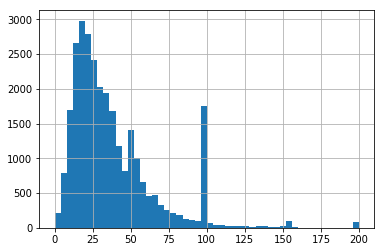

In [11]:
df['HI'].hist(bins=50)

The histogram is skewed to the right. Spikes are obvious at values 50 and 100, etc.

## Question 3(b)

mean of HI_log 3.3908269674371976
meadian of Hi_log 3.39047341829918


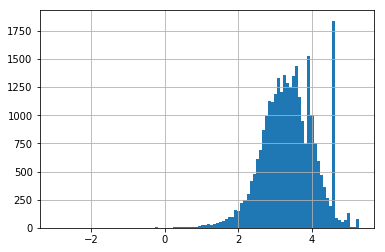

In [12]:
df['HI_log'] = np.log(df['HI'])
df['HI_log'].hist(bins=100)
print('mean of HI_log {0}'.format(df['HI_log'].mean()))
print('meadian of Hi_log {0}'.format(df['HI_log'].median()))

- The histogram is left skewed (long left tail) as the log of values greater than 0 and less than 1 results in negative values. 
- The peaks are still visibile at log(50)=3.9 and log(100)=4.6. 
- The distribution of Hi_log is asymmterical with long left tail though the mean and median are almost equal.

In [13]:
print('skewness of HI_log {}'.format(df['HI_log'].skew()))

skewness of HI_log -0.29968461580625555


- Negative value indicates that the distribution is asymmteric with long left tail as noticed in histogram

In [14]:
print('skewness of HI {}'.format(df['HI'].skew()))

skewness of HI 1.7601168927393112


- Positive value indicates that the distribution is asymmteric with right tail with larger values.

## Question 3(c)

In [27]:
df['PBLOUSES_abs'] = abs(df['PBLOUSES'])
df['PBLOUSES_abs_log'] = np.log(df['PBLOUSES_abs'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


- The runtime warning is raised since the column "PBLOUSES" contains zero values.

In [30]:
print('number of zeros in the column "PBLOUSES" {}'.format(df[['PBLOUSES_abs']][df['PBLOUSES_abs'] == 0].shape[0]))

number of zeros in the column "PBLOUSES" 11857


# <font color='blue'>Exploring the relationship between the predictors and the response</font>

# Question 4
Next, we would like to investigate the relationship with the following flag variable and the response rate: 

- <font color='blue'>WEB</font>: equals 1 for those who have made purchases via the company’s web shopping option

Please, answer the following three questions:

- (a) Using crosstabs determine how many times Web buyers are more likely to respond to those have not made a purchase via the Web.

- (b) Using normalized bar chart with the response (<font color='blue'>RESP</font>) overlay, describe for <font color='blue'>WEB</font> the relationship with the target variable.

- (c) Using <tt>stats.chi2_contingency()</tt> test if the relationship between <font color='blue'>WEB</font> and <font color='blue'>RESP</font> is significant at a 5% nominal significance level. State the null hypothese, p-value, and decision.